In [1]:
#import the libraries which are required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import sys
warnings.filterwarnings("ignore")

In [2]:
#read the data
data = pd.read_excel("EssenceMediacom Analytics Hub Technical Assessment.xlsx",parse_dates=True,sheet_name="Data")
data.head()

,Month-Year,Number of Bird Repellers Sold
0,2003-01-01,142
1,2003-02-01,157
2,2003-03-01,185
3,2003-04-01,199
4,2003-05-01,204


In [3]:
#rename the Date column
data.rename(columns={'Month-Year':"Date"},inplace=True)
data.dtypes

Date                             datetime64[ns]
Number of Bird Repellers Sold             int64
dtype: object

In [4]:
# get knowledge about shape of the data we are working on
data.shape

(144, 2)

In [5]:
#look for any null values in the data
data.isna().sum()

Date                             0
Number of Bird Repellers Sold    0
dtype: int64

In [6]:
# get the description of the data whcih shows the mean, median, qunatiles and standard deviation of the data
# with this we'll able to observe that 50% of the bird repeller that has been sold would be less that or equal to 369.
# minimum is 138 and maximum bird repeller is 871.
data.describe()

,Number of Bird Repellers Sold
count,144.000000
mean,389.708333
std,171.482302
min,138.000000
25%,248.500000
50%,369.000000
75%,509.250000
max,871.000000


<AxesSubplot: xlabel='Number of Bird Repellers Sold', ylabel='Density'>

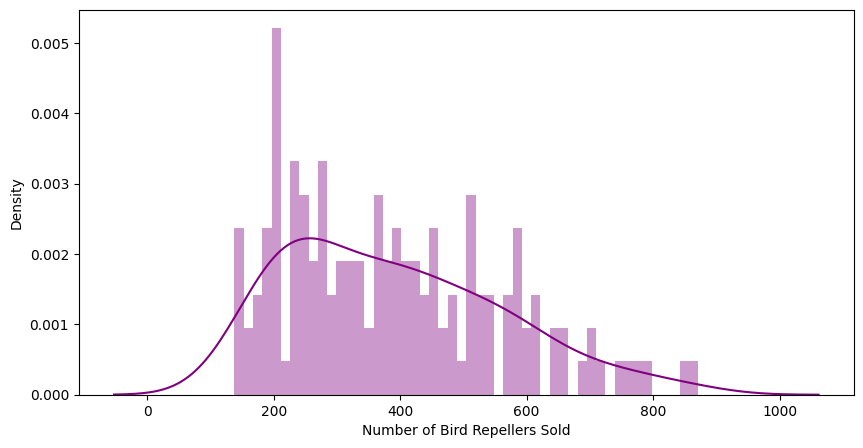

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(data['Number of Bird Repellers Sold'],bins=50,color='purple')

##with the help of density plot we are able to observe that there are certain times when the cost of bird repllers have increased and goes upto maximum of 871
## this we can conclude based on the above data description and also based on the density plot that have been created below.
## the data is positive skewed which is an indication of outliers present towards the right side of data.
## so with this we can interpret that there might be certain times where bird repellers sales have increased quite effectively.

Now based on the above description of the data and results that we have observed; we try to find out in which year, month or on quartely basis the sales of these bird repellers have increased.

In [8]:
data['month'] = data.Date.dt.month
data['day_name']=data.Date.dt.day_name()
data['year'] = data.Date.dt.year
data['Quarter'] = data.Date.dt.quarter
data.head()

,Date,Number of Bird Repellers Sold,month,day_name,year,Quarter
0,2003-01-01,142,1,Wednesday,2003,1
1,2003-02-01,157,2,Saturday,2003,1
2,2003-03-01,185,3,Saturday,2003,1
3,2003-04-01,199,4,Tuesday,2003,2
4,2003-05-01,204,5,Thursday,2003,2


In [9]:
data.year.value_counts()
## the data is based on monthly sales for every year from 2003-2014

2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
Name: year, dtype: int64

In [10]:
def plot_data(col2):
    fig,axes = plt.subplots(5,1,figsize=(10,12),sharex=False,sharey=False)
    sns.lineplot(ax=axes[0],x="Date",y=col2,data=data)
    sns.lineplot(ax=axes[1],x="month",y=col2,data=data)
    sns.lineplot(ax=axes[2],x="year",y=col2,data=data)
    sns.lineplot(ax=axes[3],x="Quarter",y=col2,data=data)
    sns.lineplot(ax=axes[4],x="day_name",y=col2,data=data)
    plt.tight_layout()
    plt.show()

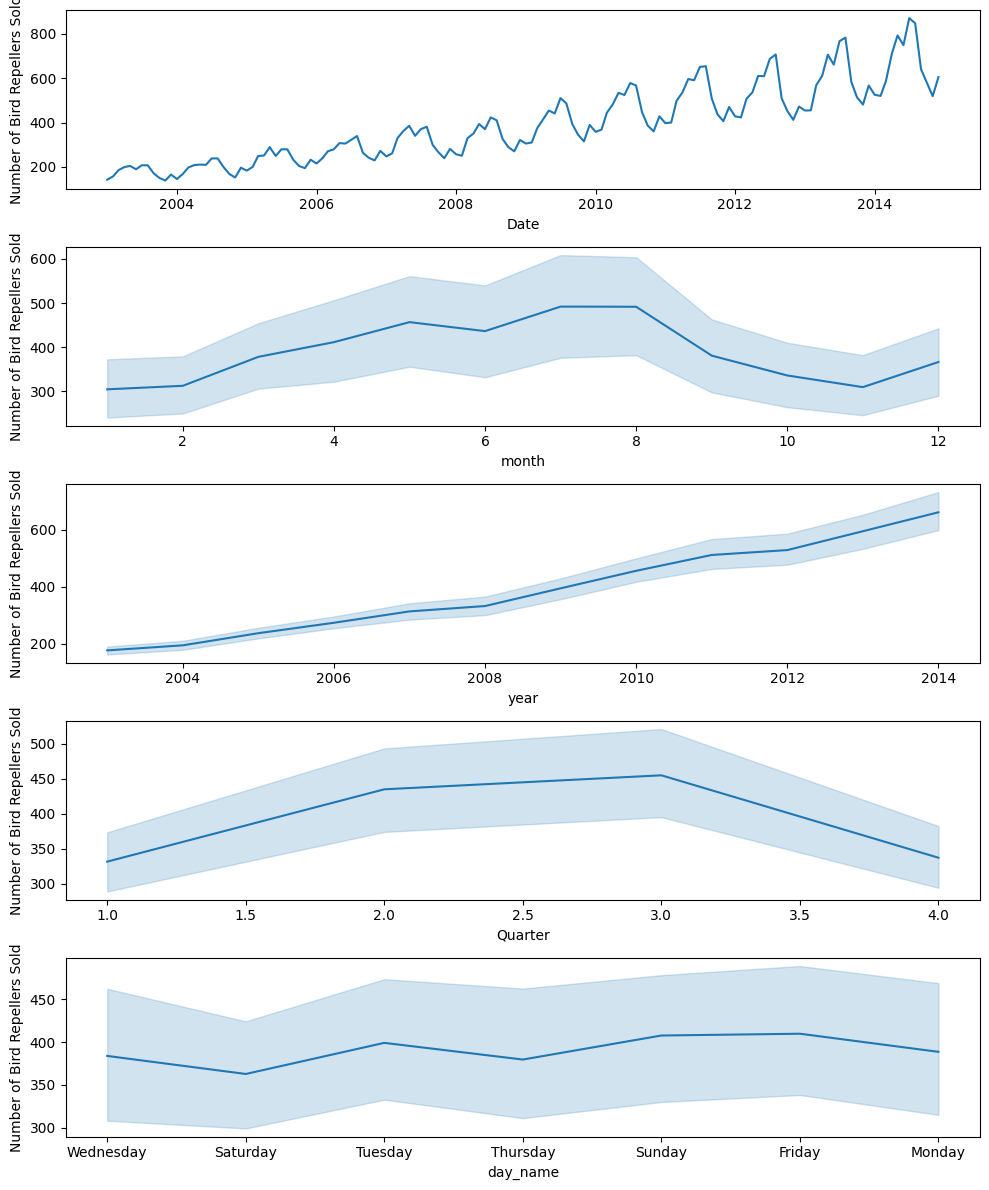

In [11]:
plot_data("Number of Bird Repellers Sold")
# with the data we are able to observe an increase in trend over the years for the demand of bird repeller and it is more of a linear trend.
## Seasonality has also been observed. During particular months of the year sales and demand has increased
## starting of the third quarter has seen an increase followed by a massive drop in last quarter.
## if we look on monthly basis in that case maximum selling of the bird repeller has been observed during the months of July and August.

In [12]:
data.head()
Year_grouped = data.groupby('year')

In [13]:
subgroup_data =[]
for i, j in Year_grouped:
    # print(i)
    subgroup_data.append(j.iloc[j['Number of Bird Repellers Sold'].argsort()[-5:]][::-1])

In [14]:
subgroup_data = pd.concat(subgroup_data).reset_index(drop=True)

<Figure size 1200x500 with 0 Axes>

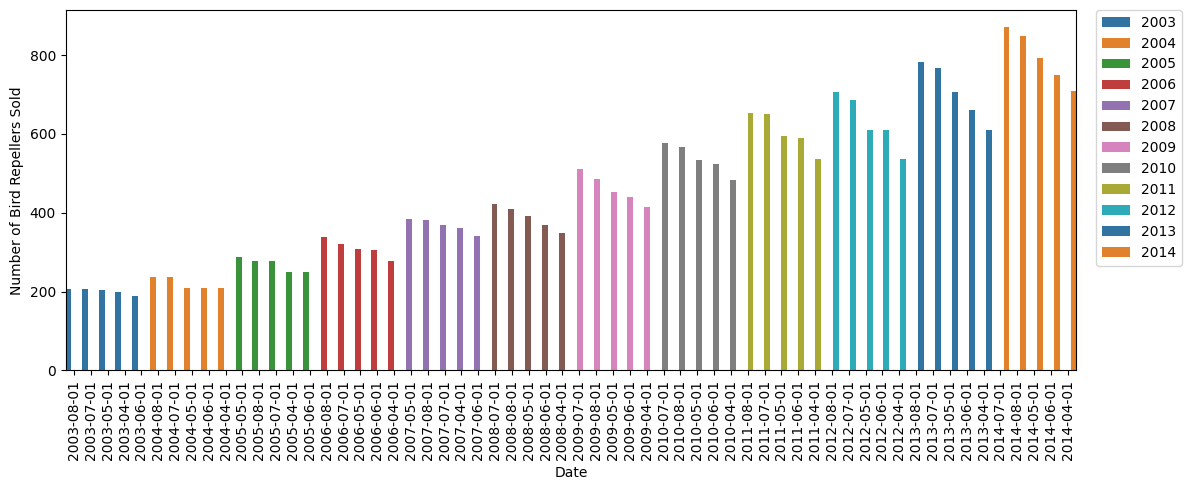

In [15]:
# subgroup_data.info()
plt.figure(figsize=(12,5))
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data=subgroup_data,x = "Date",y="Number of Bird Repellers Sold",hue='year',palette=sns.color_palette(),orient="v")
plt.xticks(plt.xticks()[0], subgroup_data.Date.dt.date, rotation=90)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .35)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


In [16]:
# subgroup_data

Graph gives us an idea that over the years the sales has increased and specifically during the months of July and August followed by April, May and June.Except for the years 2005 and 2007 where the May month has observed maximum sales of Bird Repellants. The Maximum Sales occur mostly during the 2nd and 3rd Quarters of the year from 2003 to 2014

In [17]:
## for getting the information regarding in which quarters of the year less amount of sales has been observed?
for i, j in Year_grouped:
    # print(i)
    print(j.iloc[j['Number of Bird Repellers Sold'].argsort()[:5]])

         Date  Number of Bird Repellers Sold  month   day_name  year  Quarter
10 2003-11-01                            138     11   Saturday  2003        4
0  2003-01-01                            142      1  Wednesday  2003        1
9  2003-10-01                            150     10  Wednesday  2003        4
1  2003-02-01                            157      2   Saturday  2003        1
11 2003-12-01                            165     12     Monday  2003        4
         Date  Number of Bird Repellers Sold  month   day_name  year  Quarter
12 2004-01-01                            145      1   Thursday  2004        1
22 2004-11-01                            152     11     Monday  2004        4
13 2004-02-01                            168      2     Sunday  2004        1
21 2004-10-01                            168     10     Friday  2004        4
23 2004-12-01                            196     12  Wednesday  2004        4
         Date  Number of Bird Repellers Sold  month  day_name  y

With the above information we'll be able to conclude that minimum amount of sales is observed during the 1st and 4th quarter of the years. More specifically during the October,November, December months followed by Jan and Feb.

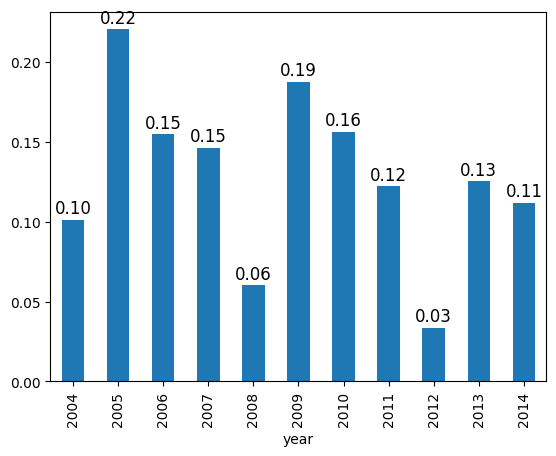

In [18]:
# percentage increase over the years
plots = data.groupby(['year'])['Number of Bird Repellers Sold'].sum().pct_change().dropna().plot(kind='bar')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

The above graph shows the percentage increase over the years. 
* Maximum increase observed in the year 2005 followed by year 2009.
* Least increase observed during the years 2012 and 2008.

In [19]:
quarter_pct_chng = data.groupby(['year','Quarter'])['Number of Bird Repellers Sold'].sum().pct_change().dropna()

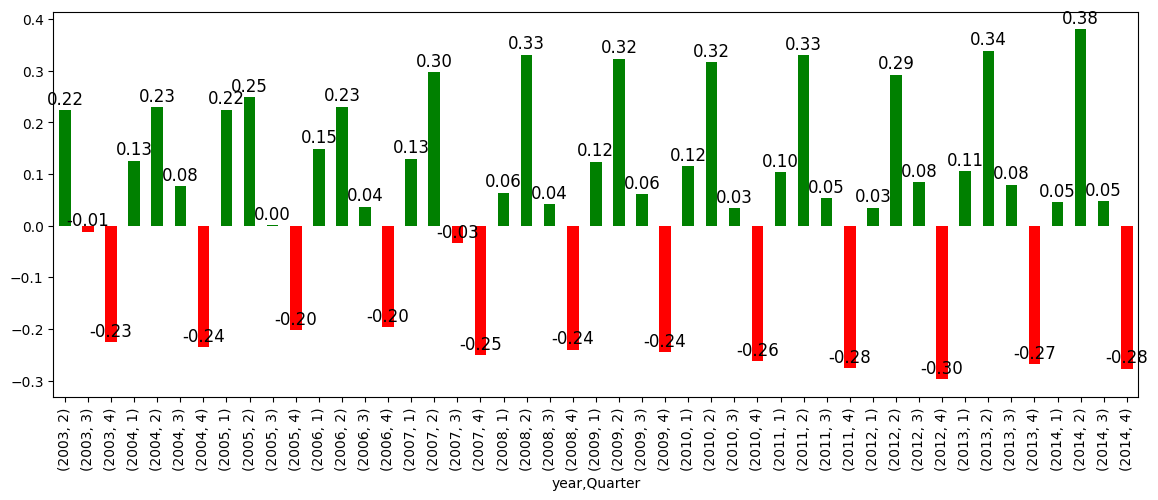

In [20]:
plt.figure(figsize=(14,5))
color = ['r' if y <0 else 'g' for y in quarter_pct_chng]
plots = quarter_pct_chng.plot(kind='bar',color = color)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

With the above graph we conclude that 
* highest increase in the sales of bird repeller has been observed  for the year 2014 during the second quarter. 
* Fourth quarter has seen a sharp decrease year on year. Demand is minimum from October till December.
* Maximum demand is observed during the second quarter of the year. So with this we can conclude that Inventory can be increased during the second quarter of the year.

Question
Find the outliers as well 

<AxesSubplot: xlabel='year', ylabel='Number of Bird Repellers Sold'>

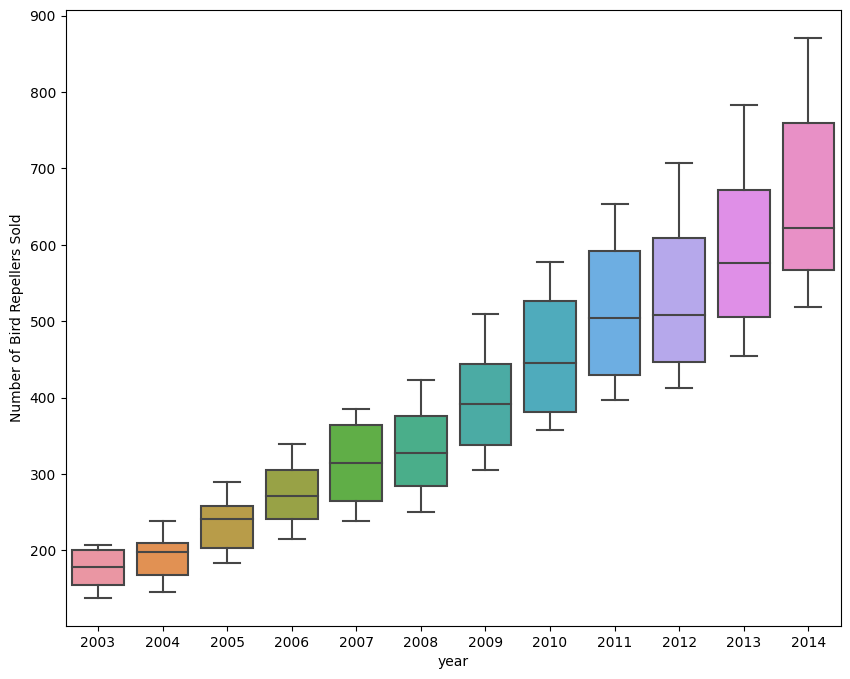

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='year',y='Number of Bird Repellers Sold',data=data,ax=ax)

<AxesSubplot: xlabel='Quarter', ylabel='Number of Bird Repellers Sold'>

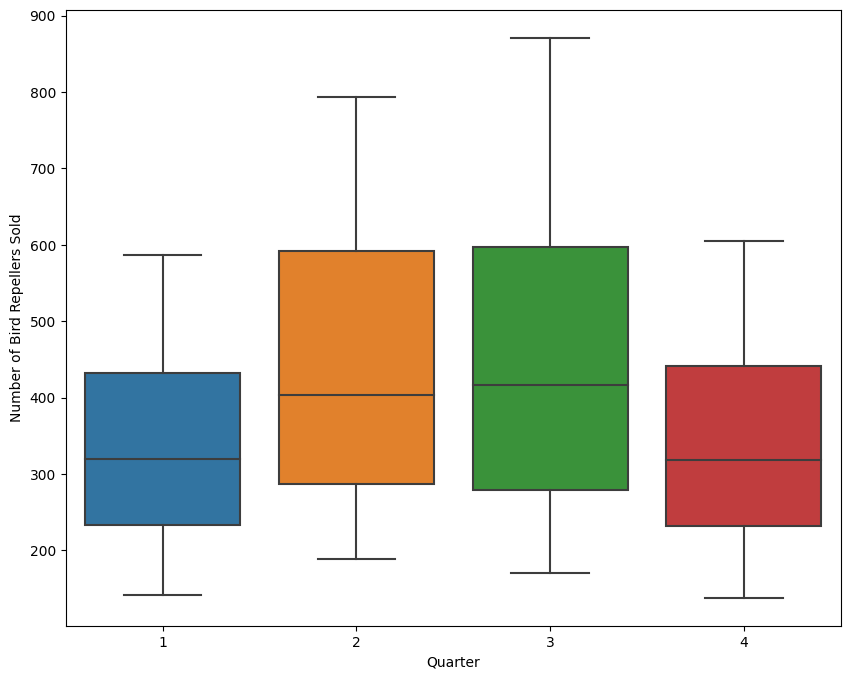

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='Quarter',y='Number of Bird Repellers Sold',data=data,ax=ax)

<AxesSubplot: xlabel='month', ylabel='Number of Bird Repellers Sold'>

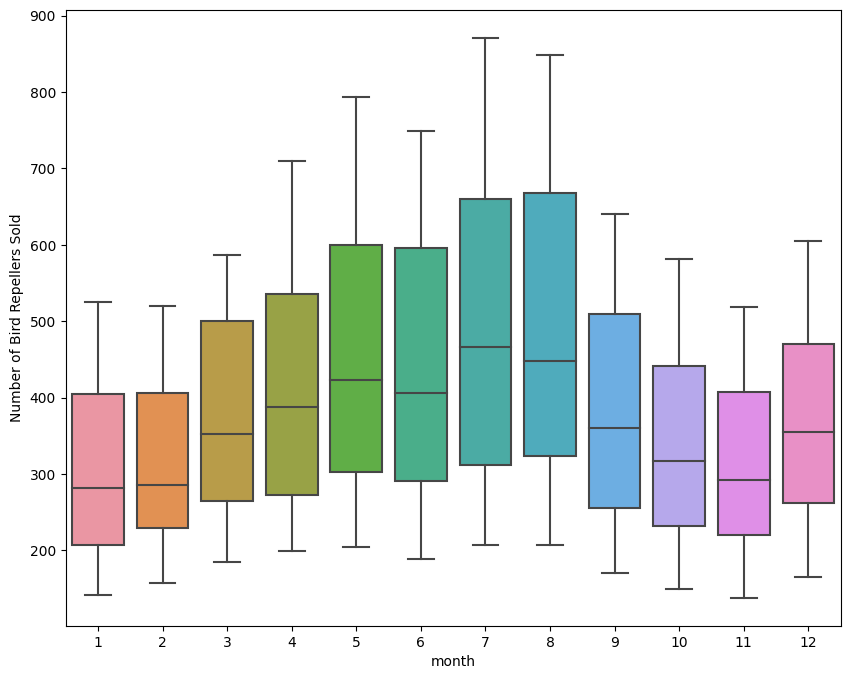

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='month',y='Number of Bird Repellers Sold',data=data,ax=ax)

Let's look how the values are been dependent on the lags or on time variable.
This can be observe via Autocorrelation and Partial-autocorrelation

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

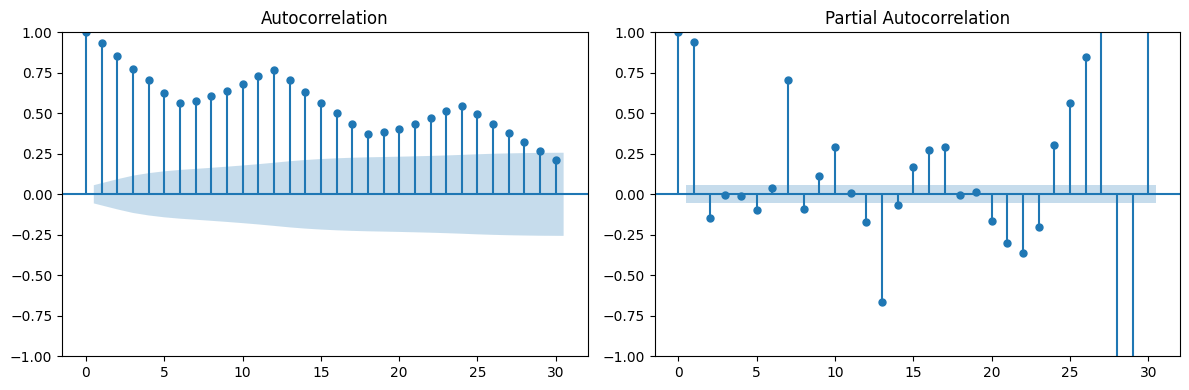

In [25]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
plot_acf(data['Number of Bird Repellers Sold'], lags=30, ax=axes[0], alpha=0.5)
plot_pacf(data['Number of Bird Repellers Sold'], lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [26]:
data['deg_shift_12'] = data['Number of Bird Repellers Sold'].shift(12,fill_value=0)
data

,Date,Number of Bird Repellers Sold,month,day_name,year,Quarter,deg_shift_12
0,2003-01-01,142,1,Wednesday,2003,1,0
1,2003-02-01,157,2,Saturday,2003,1,0
2,2003-03-01,185,3,Saturday,2003,1,0
3,2003-04-01,199,4,Tuesday,2003,2,0
4,2003-05-01,204,5,Thursday,2003,2,0
...,...,...,...,...,...,...,...
139,2014-08-01,848,8,Friday,2014,3,783
140,2014-09-01,640,9,Monday,2014,3,583
141,2014-10-01,581,10,Wednesday,2014,4,513
142,2014-11-01,519,11,Saturday,2014,4,481


Look whether the target variable that we forecasting and doing analysis does have the Stationary or Non-Stationary
* For this we will create an hypothesis based on Augmented Dickey Fuller test
* Where the Null Hyopthesis that we create is **Time Series** is **not Stationary** which means that either the mean is not constant or variance is not constant or both.**Non-Constant Covariance** remains throughout in *non-stationarity* data.
* alternate hypothesis is that time series is **stationary** where mean, variance and covariance remains constant, or **weak-stationarity** where mean and variance remains constant but **covariance is not-constant**

In [27]:
## define the fucntion to find whether the data is stationary or not

from statsmodels.tsa.stattools import adfuller
def adf(x):
    res = adfuller(x)
    print("test statistics:",res[0])
    print("p-value:",res[1] )
    if res[1]<0.05:
        print("stationary")
    else:
        print("Non_stationary")

In [28]:
adf(data['Number of Bird Repellers Sold'])

test statistics: 1.1097981949338684
p-value: 0.9952993847139399
Non_stationary


Thus, we'll able to find that data is non-stationary as in the above plots we have noticed an increase in the sales and there is a linear trend over the period of time.

In [29]:
data['diff_log'] = np.log(data['Number of Bird Repellers Sold']).diff(2)

In [30]:
data['log_val']=np.log(data['Number of Bird Repellers Sold'])

In [31]:
## first find out if converting to only log values the non-stationarity can be converted to stationarity
adf(data['log_val'])

test statistics: -1.7340669940832465
p-value: 0.4136510892988616
Non_stationary


In [32]:
adf(data['diff_log'].dropna())

test statistics: -3.21149207046181
p-value: 0.01932903578749516
stationary


In [33]:
data.head()

,Date,Number of Bird Repellers Sold,month,day_name,year,Quarter,deg_shift_12,diff_log,log_val
0,2003-01-01,142,1,Wednesday,2003,1,0,NaN,4.955827
1,2003-02-01,157,2,Saturday,2003,1,0,NaN,5.056246
2,2003-03-01,185,3,Saturday,2003,1,0,0.264529,5.220356
3,2003-04-01,199,4,Tuesday,2003,2,0,0.237059,5.293305
4,2003-05-01,204,5,Thursday,2003,2,0,0.097764,5.318120


In [35]:
## get the seasonal decomposition of the data we have
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
data.set_index("Date",inplace=True)

In [39]:
data.index.freq='MS'

In [49]:
res = seasonal_decompose(data['Number of Bird Repellers Sold'],period=12,model='multiplicative')
# in this we will be using the multiplicative model for doing seasonal decomposition because over the period of time or the seasonal component is increasing

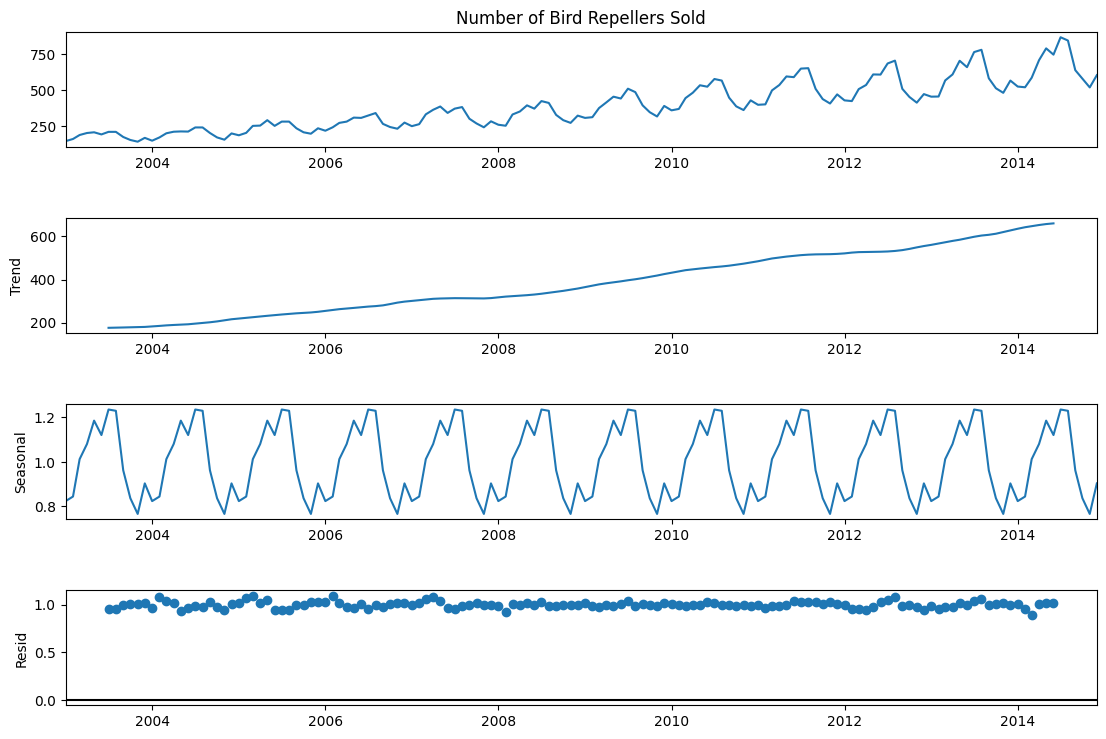

In [50]:
fig = res.plot()
fig.set_figwidth(12)
fig.set_figheight(8)

Text(0.5, 1.0, 'Correlation between the feature engineered values')

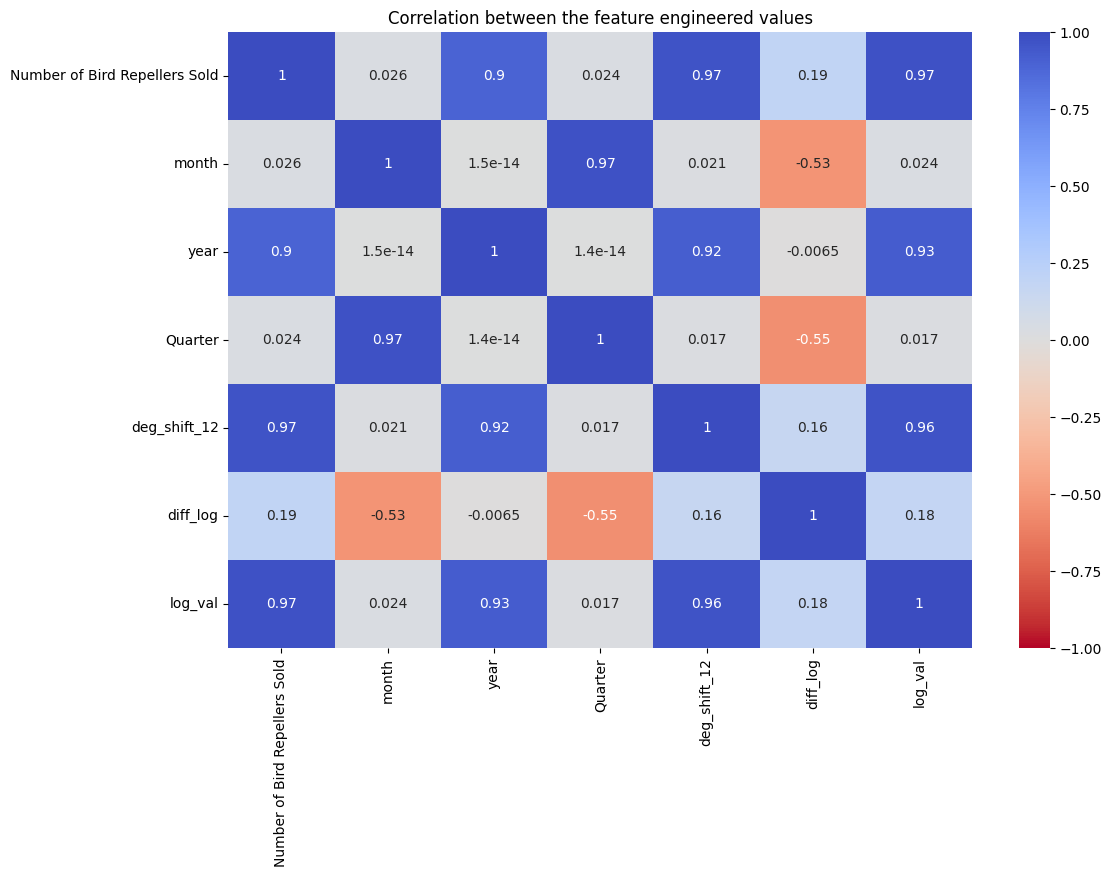

In [52]:
## how the created features are related to time series data.
fig,ax= plt.subplots(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm_r')
ax.set_title("Correlation between the feature engineered values")

Create the baseline models which is the **Holt-Winter** model. Because this model is able to capture the trend, seasonality  and the level. Let's look at the model how well it would fit on our Bird Repeller Sales Data for doing the prediction

In [53]:
N_test = 20
train_data = data.iloc[:-N_test]
test_data = data.iloc[-N_test:]

In [54]:
train_data

,Number of Bird Repellers Sold,month,day_name,year,Quarter,deg_shift_12,diff_log,log_val
Date,,,,,,,,
2003-01-01,142,1,Wednesday,2003,1,0,NaN,4.955827
2003-02-01,157,2,Saturday,2003,1,0,NaN,5.056246
2003-03-01,185,3,Saturday,2003,1,0,0.264529,5.220356
2003-04-01,199,4,Tuesday,2003,2,0,0.237059,5.293305
2003-05-01,204,5,Thursday,2003,2,0,0.097764,5.318120
...,...,...,...,...,...,...,...,...
2012-12-01,472,12,Saturday,2012,4,470,0.043297,6.156979
2013-01-01,454,1,Tuesday,2013,1,428,0.097074,6.118097
2013-02-01,455,2,Friday,2013,1,423,-0.036682,6.120297


In [55]:
test_data

,Number of Bird Repellers Sold,month,day_name,year,Quarter,deg_shift_12,diff_log,log_val
Date,,,,,,,,
2013-05-01,706,5,Wednesday,2013,2,610,0.217494,6.559615
2013-06-01,661,6,Saturday,2013,2,609,0.080295,6.493754
2013-07-01,767,7,Monday,2013,3,687,0.082872,6.642487
2013-08-01,783,8,Thursday,2013,3,707,0.169379,6.663133
2013-09-01,583,9,Sunday,2013,3,509,-0.274300,6.368187
2013-10-01,513,10,Tuesday,2013,4,452,-0.422857,6.240276
2013-11-01,481,11,Friday,2013,4,412,-0.192320,6.175867
2013-12-01,567,12,Sunday,2013,4,472,0.100083,6.340359
2014-01-01,525,1,Wednesday,2014,1,454,0.087531,6.263398


In [62]:
train_idx = data.index <= train_data.index[-1]
# len(train_idx==True)
test_idx = data.index>train_data.index[-1]
# test_idx

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [65]:
model = ExponentialSmoothing(train_data['Number of Bird Repellers Sold'],
                             initialization_method = "legacy-heuristic",
                             trend='add',
                             seasonal='mul',
                             seasonal_periods=12)
res = model.fit()

In [67]:
data.loc[train_idx,"HoltWinters_train"] = res.fittedvalues

In [69]:
data.loc[test_idx,"Holtwinters_test"] = res.forecast(N_test)

<AxesSubplot: xlabel='Date'>

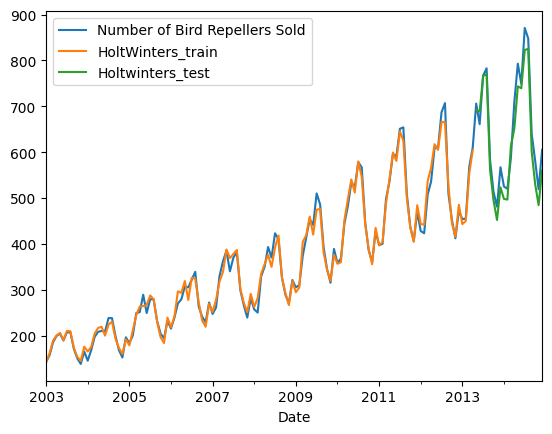

In [70]:
data[['Number of Bird Repellers Sold','HoltWinters_train','Holtwinters_test']].plot()

In [71]:
def rmse(y,t):
    return np.sqrt(np.mean((y-t)**2))

In [72]:
print("Train RMSE: ", rmse(train_data['Number of Bird Repellers Sold'],res.fittedvalues))
print("Test RMSE: ", rmse(test_data['Number of Bird Repellers Sold'],res.forecast(N_test)))

Train RMSE:  13.187858374140058
Test RMSE:  33.72447450150221


Use the ARIMA to look for other factors for example for how much past values does our current sales should depend on, further how Auto ARIMA would work and helps in using the modern computation power to select p,d and q. 

Also how seasonality (SARIMA) and exogenous data (SARIMAX) we can add.

Auto-Regressive and Moving Average and I is Integrated.

Auto-Regressive and Exponential Smoothing models; ES are specific model linear trend and seasonality; ARIMA imposes no such restrictions.

ARIMA is linear regression; which is y=mx+b; More than one input in that case y = w1x1+w2x2+b; It is more of multiple-regression having various past inputs in it.

Model is expressive because here weights are given based on which we making a prediction.

**Moving Average** is a linear function of past error terms. T.S. depends on the errors y depends on q past error terms.



In [74]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima  as pm

In [76]:
data2 = data.copy()

In [81]:
data2.head()
data2_exog = data2[["month","day_name","year","Quarter","deg_shift_12"]]

In [82]:
data2_exog

,month,day_name,year,Quarter,deg_shift_12
Date,,,,,
2003-01-01,1,Wednesday,2003,1,0
2003-02-01,2,Saturday,2003,1,0
2003-03-01,3,Saturday,2003,1,0
2003-04-01,4,Tuesday,2003,2,0
2003-05-01,5,Thursday,2003,2,0
...,...,...,...,...,...
2014-08-01,8,Friday,2014,3,783
2014-09-01,9,Monday,2014,3,583
2014-10-01,10,Wednesday,2014,4,513


In [84]:
df= pd.get_dummies(data2_exog,columns=["month","day_name","year","Quarter"],prefix=['month','day_name','year','Quarter'],drop_first=True)
df.head()

,deg_shift_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,Quarter_2,Quarter_3,Quarter_4
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-02-01,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-01,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-04-01,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2003-05-01,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
features_numeric = data2[["deg_shift_12"]]
scaler = StandardScaler().fit(features_numeric.values)
features = scaler.transform(features_numeric.values)

In [90]:
df['deg_shift_12']= features

In [91]:
df.head()

,deg_shift_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,Quarter_2,Quarter_3,Quarter_4
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,-1.888865,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-02-01,-1.888865,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-01,-1.888865,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-04-01,-1.888865,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2003-05-01,-1.888865,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
train_data.head()

,Number of Bird Repellers Sold,month,day_name,year,Quarter,deg_shift_12,diff_log,log_val
Date,,,,,,,,
2003-01-01,142,1,Wednesday,2003,1,0,NaN,4.955827
2003-02-01,157,2,Saturday,2003,1,0,NaN,5.056246
2003-03-01,185,3,Saturday,2003,1,0,0.264529,5.220356
2003-04-01,199,4,Tuesday,2003,2,0,0.237059,5.293305
2003-05-01,204,5,Thursday,2003,2,0,0.097764,5.318120


In [93]:
df.iloc[train_idx,:]

,deg_shift_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,Quarter_2,Quarter_3,Quarter_4
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,-1.888865,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-02-01,-1.888865,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-03-01,-1.888865,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003-04-01,-1.888865,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2003-05-01,-1.888865,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-01,0.765035,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2013-01-01,0.527878,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2013-02-01,0.499645,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [94]:
model2 = pm.auto_arima(
    train_data['Number of Bird Repellers Sold'],
    exogenous=df.iloc[train_idx,:],
    trace=True,
    seasonal=True,
    suppress_warnings=True,
    m=12
)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1024.603, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=926.556, Time=0.60 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=972.971, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1176.401, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=926.997, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=926.930, Time=1.56 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=927.181, Time=1.36 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=927.103, Time=0.57 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.05 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1026.393, Time=0.40 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=927.752, Time=0.56 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=927.975, Time=0.54 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=972.878, Time=0.54 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   :

In [95]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  124
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -459.278
Date:                            Tue, 28 Feb 2023   AIC                            926.556
Time:                                    05:34:26   BIC                            937.430
Sample:                                01-01-2003   HQIC                           930.967
                                     - 04-01-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.9184      3.333      2.976      0.003       3.387      16.450
ar.L1          0.7848      0.064     12.284      0.000       0.660       0.910
ar.S.L12      -0.1583      0.095     -1.673      0.094      -0.344       0.027
sigma2       211.0766     25.390      8.313      0.000     161.313     260.840
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 3.12
Prob(Q):                              0.42   Prob(JB):                         0.21
Heteroskedasticity (H):               1.45   Skew:                            -0.18
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
df.iloc[test_idx,:]

,deg_shift_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,Quarter_2,Quarter_3,Quarter_4
Date,,,,,,,,,,,,,,,,,,,,,
2013-05-01,1.555559,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2013-06-01,1.549912,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2013-07-01,1.990347,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2013-08-01,2.103278,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2013-09-01,0.985253,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2013-10-01,0.663397,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2013-11-01,0.437533,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2013-12-01,0.776328,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2014-01-01,0.674690,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
model2.fit(train_data['Number of Bird Repellers Sold'],
           exogenous= df.iloc[train_idx,:])

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [99]:
test_pred, confint = model2.predict(n_periods=N_test,exogenous = df.iloc[test_idx,:],return_conf_int=True)

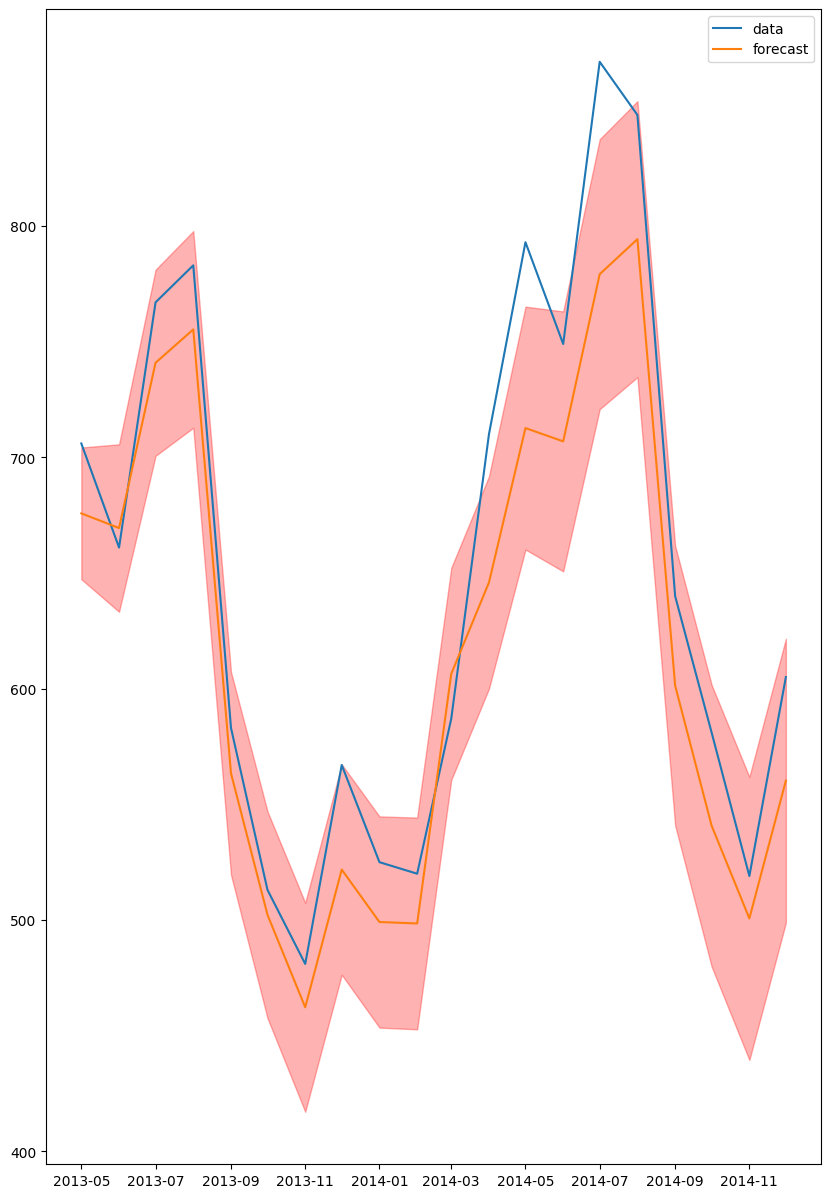

In [102]:
fig,ax = plt.subplots(figsize=(10,15))
ax.plot(test_data.index,test_data['Number of Bird Repellers Sold'],label='data')
ax.plot(test_data.index,test_pred,label='forecast')
ax.fill_between(test_data.index,confint[:,0],confint[:,1],color='red',alpha=0.3)

ax.legend()

In [103]:
print("Test RMSE: ", rmse(test_data['Number of Bird Repellers Sold'],test_pred))

Test RMSE:  42.394894891290086


In [106]:
forecast2 = model2.predict(n_periods=30,exogenous = df.iloc[test_idx,:],return_conf_int=True)

In [113]:
forecast2[0].values

array([675.77767466, 669.43067551, 740.88233378, 755.28839721,
       563.39820595, 502.23596042, 462.25703068, 521.78875535,
       499.1259184 , 498.49796048, 606.37575829, 645.90044947,
       712.6515947 , 706.89354745, 779.17967082, 794.31260406,
       601.33103053, 540.72993343, 500.67106276, 560.21678131,
       538.24475198, 537.83742335, 646.49685515, 686.39050874,
       752.96968399, 747.10437649, 819.24740493, 834.25664472,
       641.44101535, 580.74577654])

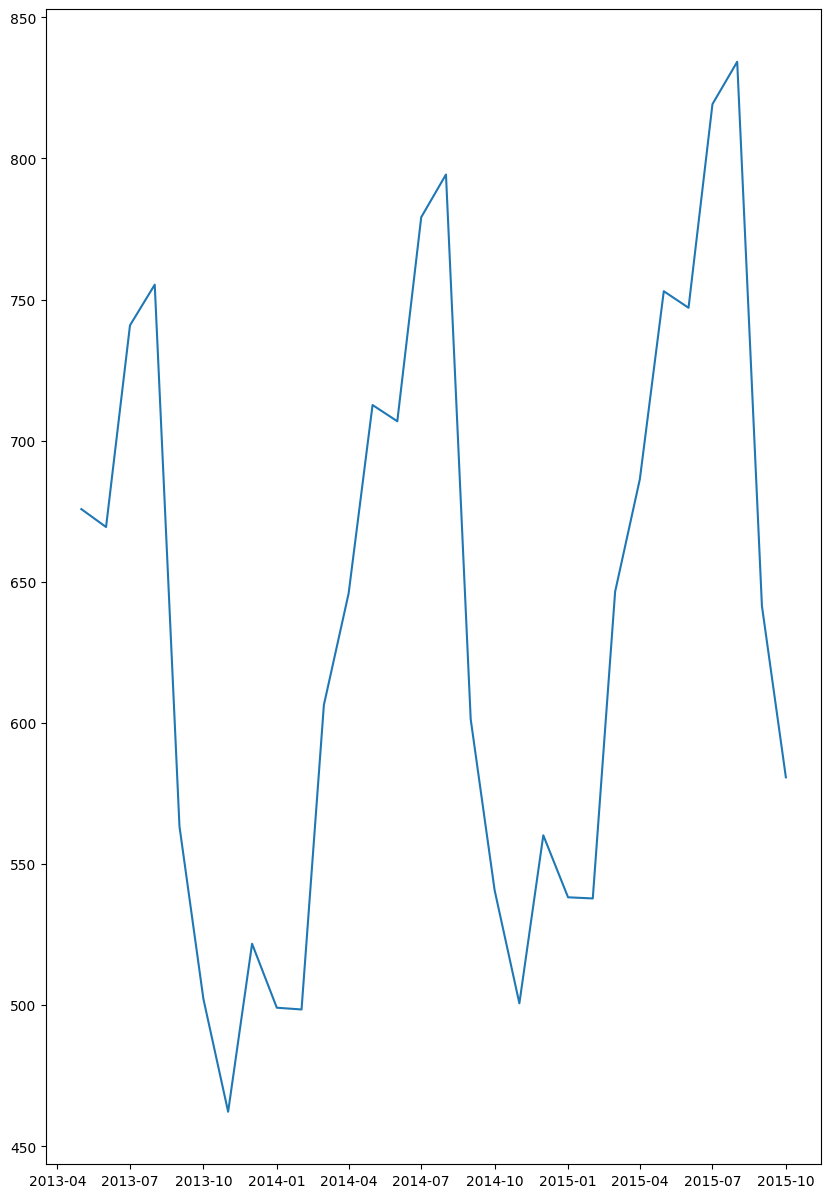

In [115]:
fig,ax = plt.subplots(figsize=(10,15))
ax.plot(forecast2[0].index,forecast2[0].values,label='forecast')

In [34]:
# data['Number of Bird Repellers Sold'].iat[2]+0.097764

185.097764